# 1. Conjunto de datos

In [32]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)


In [12]:
# Indices de las palabras
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [13]:
# Numero de datos de entrenamiento, numero de datos de testing
print("Training data:", len(train_data))
print("Testing data:", len(test_data))

Training data: 8982
Testing data: 2246


In [5]:
# Primer articulo del conjunto de datos de entrenamiento
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [18]:
reversed_word_index = {v : k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '('+str(i)+')' ) for i in train_data[0]])

'(1) (2) (2) said as a result of its december acquisition of (2) co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and (2) (2) revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash (2) per share this year should be 2 50 to three dlrs reuter 3'

In [19]:
train_labels[0]

np.int64(3)

# 2. Preprocesamiento del conjunto de datos

In [22]:
import numpy as np
def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1
    return results

In [28]:
X_train = vectorize(train_data,10000)
X_test = vectorize(test_data, 10000)

In [24]:
print("Valores oriiginales:\t", train_data[0][:15])
print("Valores vectorizados:\t", X_train[0][:15])

Valores oriiginales:	 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16]
Valores vectorizados:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [33]:
from keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [26]:
train_labels[0]

np.int64(3)

In [27]:
Y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [47]:
print("Longitud subconjuto de entrenamiento:", len(X_train))
print("Longitud del subconjunto de validacion:", len(X_val))
print("Longitud del subconjunto de pruebas", len(X_test))

Longitud subconjuto de entrenamiento: 8982
Longitud del subconjunto de validacion: 1123
Longitud del subconjunto de pruebas 1123


# 3 construccion de la red neuronal artificial

In [48]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



In [49]:
from keras import optimizers

opt_func = optimizers.SGD(learning_rate=0.01)

In [50]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    epochs = 10,
    batch_size=512
    validation_data=(X_val, Y_val)
)

Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - Precision: 0.9441 - accuracy: 0.4873 - loss: 2.3515 - val_Precision: 0.9338 - val_accuracy: 0.5476 - val_loss: 1.8676
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Precision: 0.9273 - accuracy: 0.6016 - loss: 1.6866 - val_Precision: 0.9257 - val_accuracy: 0.6411 - val_loss: 1.6526
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Precision: 0.9244 - accuracy: 0.6597 - loss: 1.5088 - val_Precision: 0.9071 - val_accuracy: 0.6643 - val_loss: 1.5281
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Precision: 0.9230 - accuracy: 0.6892 - loss: 1.3890 - val_Precision: 0.8985 - val_accuracy: 0.6821 - val_loss: 1.4439
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - Precision: 0.9220 - accuracy: 0.7101 - loss: 1.2991 - val_Precision: 0.9107 - val_accuracy: 0.6946 - val_loss: 1.3804
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Precision: 0.9197 - accuracy: 0.7239 - loss: 1.2281 - val_Precision: 0.8983 - va

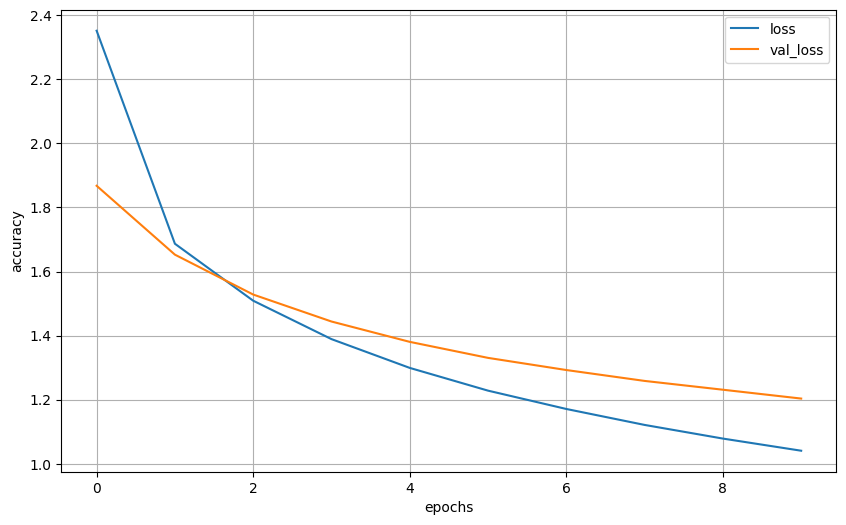

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

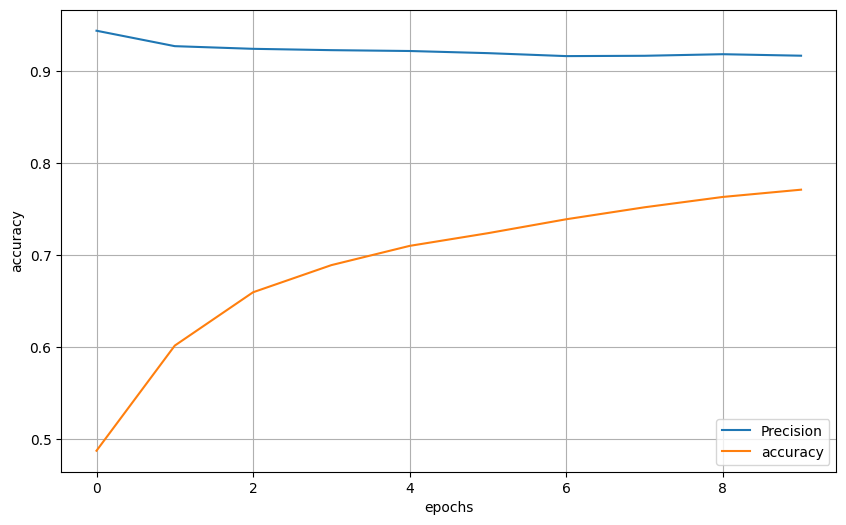

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[['Precision','accuracy']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()